In [4]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

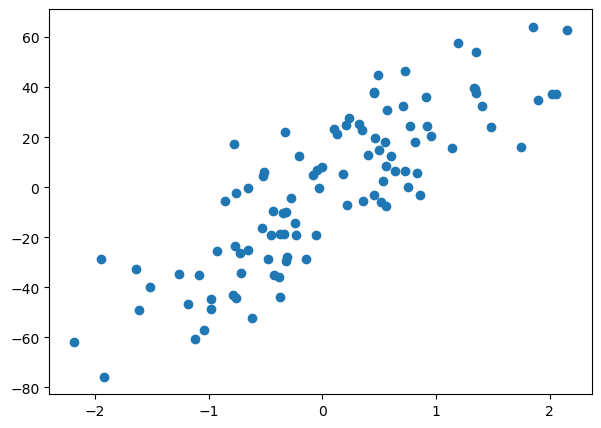

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(X,y)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)
y_pred

array([-1.30327766e+01,  1.08788292e+01, -2.19728239e+01, -4.29043723e+00,
       -3.11299813e+01,  3.37543215e+01,  2.31718319e+01,  3.43113865e+01,
       -2.56585164e+01,  6.53924676e+00,  1.63916214e+01, -9.35278055e+00,
        5.35672988e+00,  1.18204794e+01,  1.02212327e+01, -1.82063567e+01,
       -1.55916965e+01,  2.89149920e-02, -1.13371693e+01, -5.80771978e+01])

In [17]:
lr.coef_

array([28.03410144])

In [18]:
lr.intercept_

-3.5399180789431823

In [20]:
r2_score(y_test,y_pred)

0.5712619168747146

In [1]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte m and b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [64]:
obj = GDRegressor(0.01,13)

In [65]:
obj.fit(X_train,y_train)

28.194100181565187 -3.2761686934109857


In [66]:
y_pred1 = obj.predict(X_test)

In [67]:
r2_score(y_test,y_pred1)

0.5753724451990423